In [1]:
from sklearn.metrics import accuracy_score, auc, roc_curve, roc_auc_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
def confusion_matrix_plot(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix')
    plt.show()

In [3]:
def roc_curve_plot(y_true, y_pred):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

In [4]:
import numpy as np
import pandas as pd

In [5]:
fake_news = pd.read_csv('./data_original/Fake.csv',sep=',')
true_news = pd.read_csv('./data_original/True.csv',sep=',')

In [6]:
fake_news['isTrue'] = 0
true_news['isTrue'] = 1
df = pd.concat([fake_news, true_news], axis=0)
df = df.drop(['title', 'subject', 'date'], axis=1)
df.head()

,text,isTrue
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [7]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    text = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    text = [i for i in text if not i in stop_words]
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text]
    text = ' '.join(text)

    return text

df["text"] = df["text"].apply(preprocess_text)

In [8]:
x = df["text"]
y = df["isTrue"]

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xv_train,y_train)
pred_lr = lr.predict(xv_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_lr))
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_lr)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4750
           1       0.99      0.99      0.99      4230

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



0.9867483296213808

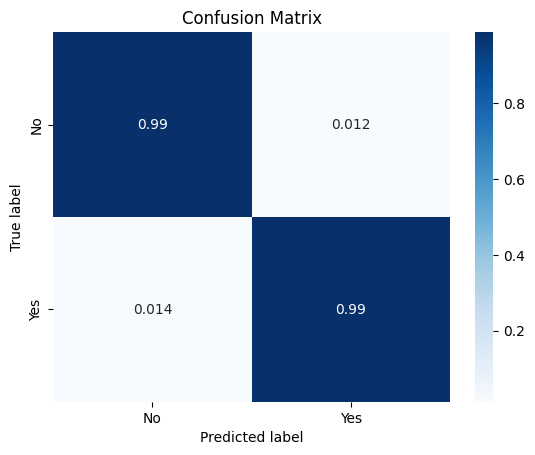

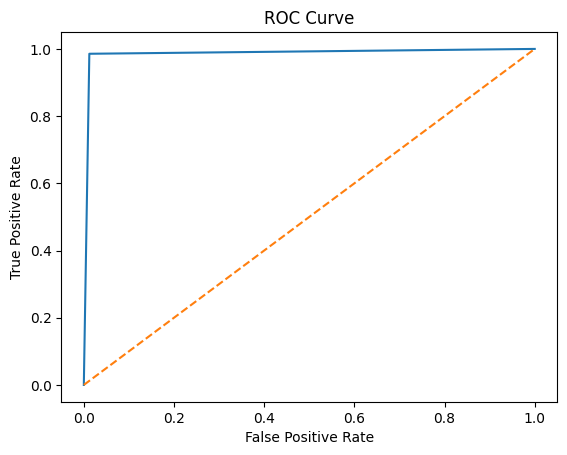

In [12]:
confusion_matrix_plot(y_test, pred_lr)
roc_curve_plot(y_test, pred_lr)

In [13]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(xv_train, y_train)
pred_nb = nb.predict(xv_test)
print(classification_report(y_test, pred_nb))
accuracy_score(y_test, pred_nb)


              precision    recall  f1-score   support

           0       0.95      0.94      0.94      4750
           1       0.94      0.94      0.94      4230

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



0.9409799554565702

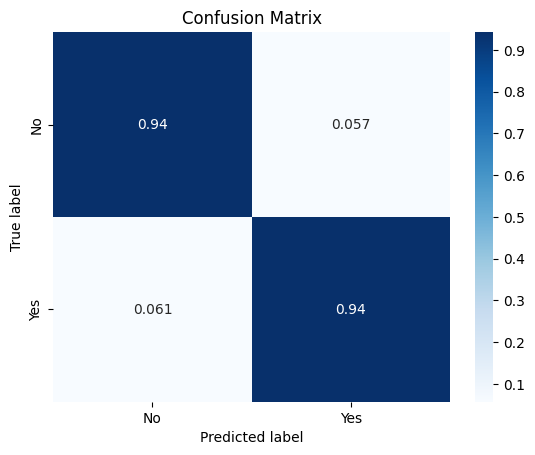

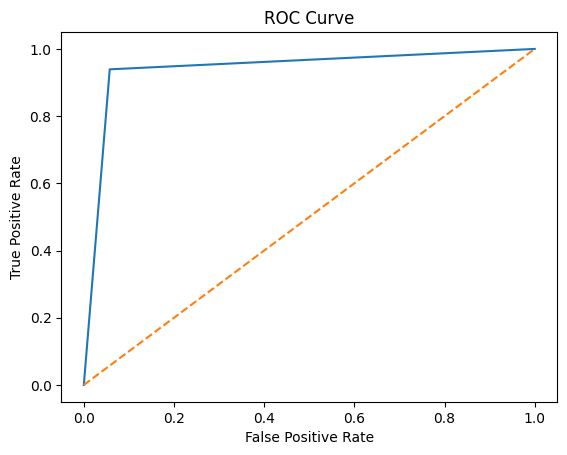

In [14]:
confusion_matrix_plot(y_test, pred_nb)
roc_curve_plot(y_test, pred_nb)

In [15]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(xv_train, y_train)
pred_dt = dt.predict(xv_test)
print(classification_report(y_test, pred_dt))
accuracy_score(y_test, pred_dt)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4750
           1       1.00      1.00      1.00      4230

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



0.9963251670378619

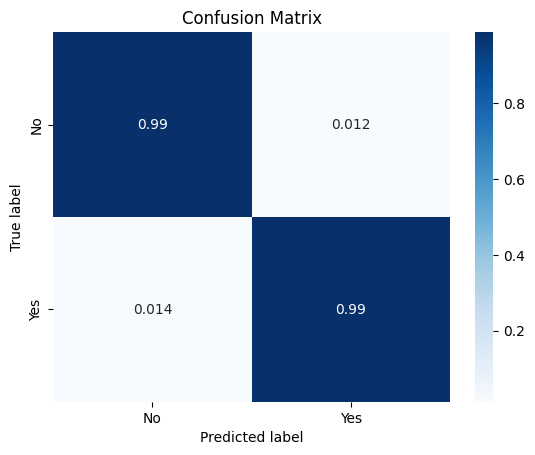

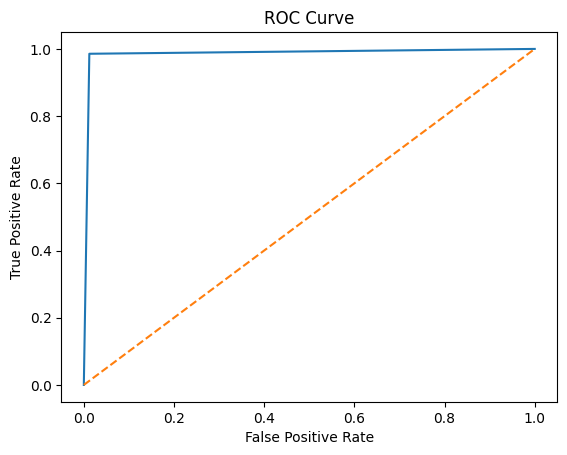

In [16]:
confusion_matrix_plot(y_test, pred_lr)
roc_curve_plot(y_test, pred_lr)

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(xv_train, y_train)
pred_rf = rf.predict(xv_test)
print(classification_report(y_test, pred_rf))
accuracy_score(y_test, pred_rf)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4750
           1       0.98      0.99      0.99      4230

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



0.9865256124721603

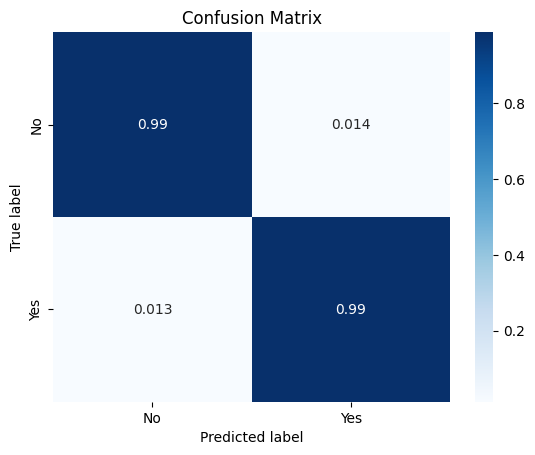

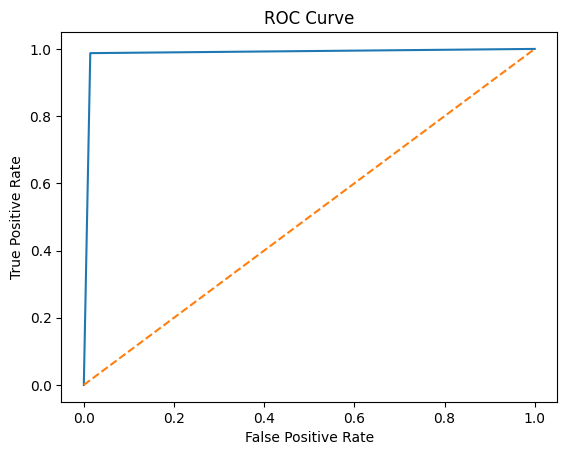

In [18]:
confusion_matrix_plot(y_test, pred_rf)
roc_curve_plot(y_test, pred_rf)

In [19]:
models_accuracy = {
    'Logistic Regression': accuracy_score(y_test, pred_lr),
    'Naive Bayes': accuracy_score(y_test, pred_nb),
    'Decision Tree': accuracy_score(y_test, pred_dt),
    'Random Forest': accuracy_score(y_test, pred_rf)
}

models_accuracy=pd.DataFrame(models_accuracy.items(), columns=['Model', 'Accuracy'])
models_accuracy.sort_values(by='Accuracy', ascending=False)
models_accuracy

,Model,Accuracy
0,Logistic Regression,0.986748
1,Naive Bayes,0.940980
2,Decision Tree,0.996325
3,Random Forest,0.986526


In [21]:
import pickle
pickle.dump(vectorization, open('./model/vectorizer.pkl', 'wb'))
pickle.dump(lr, open('./model/model.pkl', 'wb'))